In [108]:
print('Hello')

Hello


In [109]:
import numpy as np
import pandas as pd
import kaggle
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
import warnings
warnings.filterwarnings('ignore')

In [111]:
kaggle.api.authenticate()
kaggle.api.dataset_download_files('mirichoi0218/insurance',unzip=True,path='./dataset')

Dataset URL: https://www.kaggle.com/datasets/mirichoi0218/insurance


In [112]:
df = pd.read_csv('./dataset/insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [113]:
df.shape

(1338, 7)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [115]:
df.isna().sum().sum()

np.int64(0)

In [116]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [117]:
df.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [118]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

# Univariate analysis

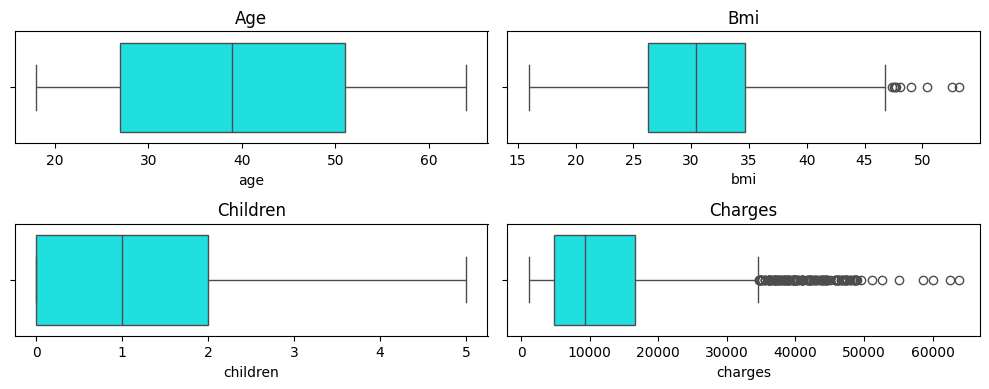

In [ ]:
total=len(df.select_dtypes(include='number').columns)
fig,axes = plt.subplots(2,2,figsize=(10,4))
axes = axes.flatten()
for i,col in enumerate(df.select_dtypes(include='number').columns):
    sns.boxplot(x=df[col],ax=axes[i],orient='h',color='cyan')
    axes[i].set_title(col.title())
plt.tight_layout()
plt.show()


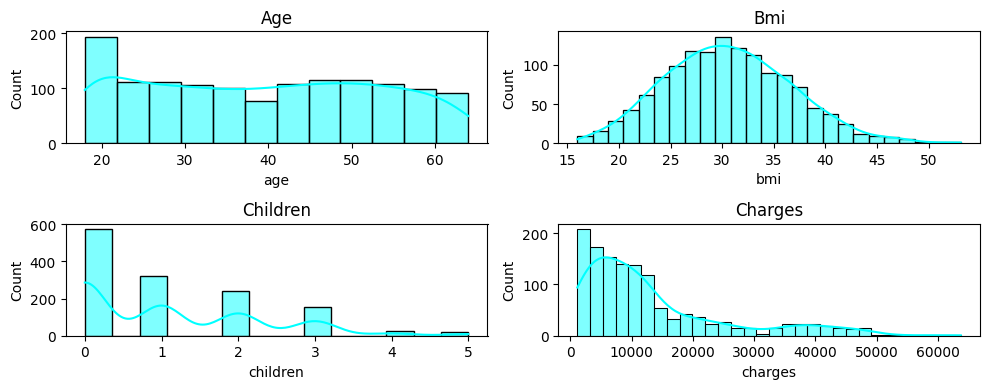

In [124]:
total=len(df.select_dtypes(include='number').columns)
fig,axes = plt.subplots(2,2,figsize=(10,4))
axes = axes.flatten()
for i,col in enumerate(df.select_dtypes(include='number').columns):
    sns.histplot(x=df[col],ax=axes[i],color='cyan',kde=True)
    axes[i].set_title(col.title())
plt.tight_layout()
plt.show()


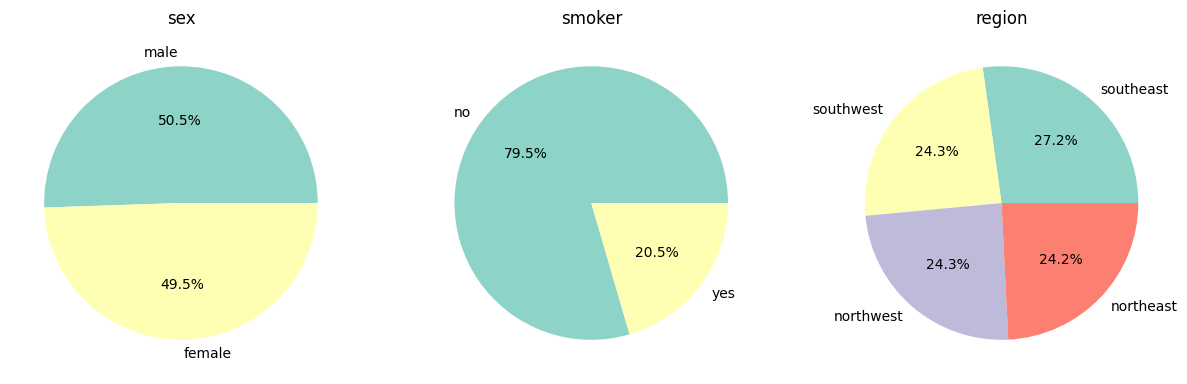

In [120]:
fig,axes = plt.subplots(1,3,figsize=(15,5))
axes = axes.flatten()
for i, col in enumerate(df.select_dtypes(exclude='number').columns):
    counts = df[col].value_counts()
    axes[i].pie(counts.values, labels=counts.index, autopct='%1.1f%%',colors=plt.cm.Set3.colors[:len(counts)]
)
    axes[i].set_title(f'{col}')

In [ ]:
# Converting object to bool using get_dummies
df=pd.get_dummies(df)

In [ ]:
#